In [1]:
import pandas as pd
import wbgapi as wb
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Linear Regression

For today's lecture, I am using the 3rd Chapter of [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) by Gareth et.al., 3rd Chapter of [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) by Hastie et.al. and the 3rd Chapter of [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) by Bishop.

## Ordinary Least Squares Regression

Assume we have a data set consisting of numerical pairs $(x_i,y_i)$, and assume also that upon some inspection, we guess that there is a linear dependence between $x_i$'s and $y_i$'s of the form

$$  y_i \approx \alpha x_i + \beta + \epsilon $$

In this scenario, we assume the $y_i$ values depend on $x_i$ values functionally, moreover, we also assume that the functional relationship is linear. In such cases, $y_i$'s are called *dependent variable* and $x_i$'s are called *independent variables*. Our task is then to calculate the best fitting $\alpha$ and $\beta$ for this set.

## How and why does linear regression work?
   
The question we need to ask is, in linear regression what is our **fit criteria** or what is our **error function**?

$$ RSS(\alpha,\beta) = \sum_{i=1}^N (\alpha x_i + \beta - y_i)^2 $$

The (ordinary least square) regression finds $\alpha$ and $\beta$ that minimizes this function $RSS(\alpha,\beta)$:
$$ \alpha = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2}, \qquad \beta = \overline{y} - \alpha \overline{x} $$
    
## How do we judge if the model fit?

The $R^2$-statistic tells us how much of the error is explained by the independent variable:
$$ RSE(\alpha,\beta) = \sqrt{\frac{RSS(\alpha,\beta)}{n-2}}, \qquad R^2 = 1 - \frac{RSE}{RSS} $$


## Examples


In [2]:
litrate = pd.DataFrame(list(wb.data.fetch('SE.ADT.LITR.FE.ZS')))
litrate

,value,series,economy,aggregate,time
0,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2021
1,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2020
2,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2019
3,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2018
4,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1964
16488,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1963
16489,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1962
16490,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1961


In [3]:
mortality = pd.DataFrame(list(wb.data.fetch('SH.DYN.MORT')))
mortality

,value,series,economy,aggregate,time
0,NaN,SH.DYN.MORT,ZWE,False,YR2021
1,53.9,SH.DYN.MORT,ZWE,False,YR2020
2,54.2,SH.DYN.MORT,ZWE,False,YR2019
3,54.8,SH.DYN.MORT,ZWE,False,YR2018
4,57.0,SH.DYN.MORT,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SH.DYN.MORT,AFE,True,YR1964
16488,NaN,SH.DYN.MORT,AFE,True,YR1963
16489,NaN,SH.DYN.MORT,AFE,True,YR1962
16490,NaN,SH.DYN.MORT,AFE,True,YR1961


In [4]:
ltr = litrate[['time','value']][litrate['economy']=='TUR']
ltr.index = ltr.time
del ltr['time']
ltr.columns = [['literacy']]
ltr

,literacy
time,
YR2021,NaN
YR2020,NaN
YR2019,94.424042
YR2018,NaN
YR2017,93.498268
...,...
YR1964,NaN
YR1963,NaN
YR1962,NaN


In [5]:
mtr = mortality[['time','value']][mortality['economy']=='TUR']
mtr.index = mtr.time
del mtr['time']
mtr.columns = [['mortality']]
mtr

,mortality
time,
YR2021,NaN
YR2020,9.5
YR2019,10.1
YR2018,10.7
YR2017,11.4
...,...
YR1964,225.7
YR1963,233.5
YR1962,241.4


In [6]:
def extract(df,cntry,name):
    tmp = df[['time','value']][df['economy']==cntry]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp

def litvsmor(cntry):
    lit = extract(litrate,cntry,'literacy')
    mor = extract(mortality,cntry,'mortality')
    res = mor.join(lit)
    res.dropna(inplace=True)
    return res

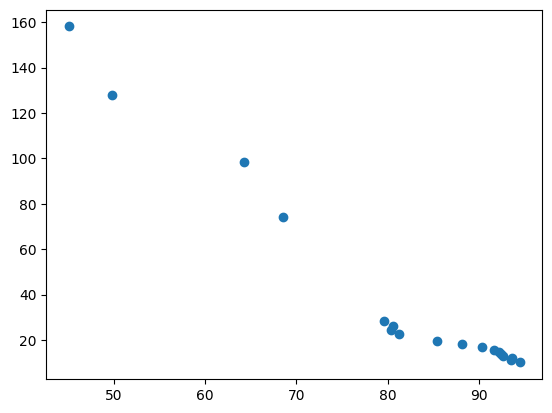

In [7]:
tr = litvsmor('TUR')
plt.scatter(tr['literacy'],tr['mortality'])

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.64e-11
Time:                        19:52:12   Log-Likelihood:                -67.223
No. Observations:                  18   AIC:                             138.4
Df Residuals:                      16   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           273.0338     14.304     19.089

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


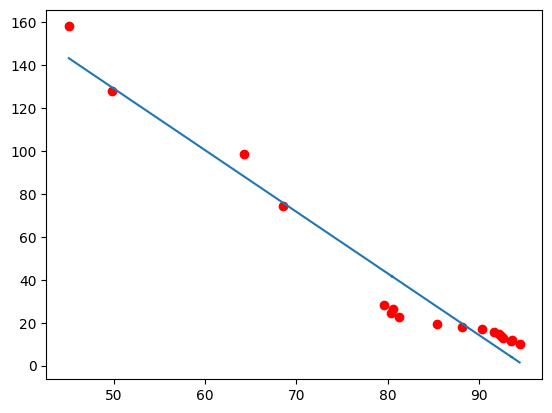

In [8]:
res = litvsmor('TUR')
X = res['literacy']
Y = res['mortality']
XX = sm.add_constant(X)
model = sm.OLS(Y,XX)
results = model.fit()
alpha,beta = results.params
print(results.summary())
plt.scatter(X,Y,c='red')
plt.plot(X,alpha + beta*X)

In [9]:
gini = pd.DataFrame(list(wb.data.fetch('SI.POV.GINI')))
gini

,value,series,economy,aggregate,time
0,NaN,SI.POV.GINI,ZWE,False,YR2021
1,NaN,SI.POV.GINI,ZWE,False,YR2020
2,50.3,SI.POV.GINI,ZWE,False,YR2019
3,NaN,SI.POV.GINI,ZWE,False,YR2018
4,44.3,SI.POV.GINI,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SI.POV.GINI,AFE,True,YR1964
16488,NaN,SI.POV.GINI,AFE,True,YR1963
16489,NaN,SI.POV.GINI,AFE,True,YR1962
16490,NaN,SI.POV.GINI,AFE,True,YR1961


In [10]:
def morvsgini(cntry):
    gin = extract(gini,cntry,'gini')
    mor = extract(mortality,cntry,'mortality')
    res = gin.join(mor)
    res.dropna(inplace=True)
    return res

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.390
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.140
Time:                        19:52:40   Log-Likelihood:                -85.053
No. Observations:                  20   AIC:                             174.1
Df Residuals:                      18   BIC:                             176.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.7370    115.269     -1.334      0.1

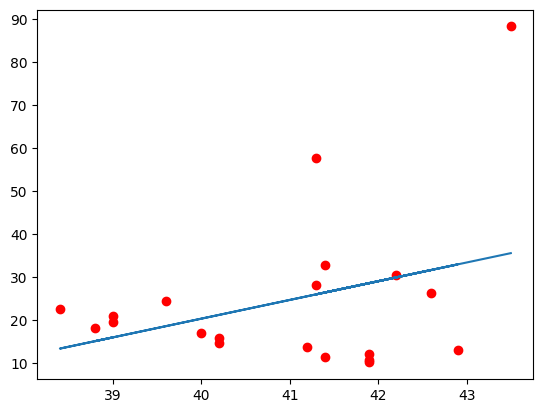

In [11]:
res = morvsgini('TUR')
X = res['gini']
Y = res['mortality']
XX = sm.add_constant(X)
model = sm.OLS(Y,XX)
results = model.fit()
alpha,beta = results.params
print(results.summary())
plt.scatter(X,Y,c='red')
plt.plot(X,alpha + beta*X)

In [12]:
def litvsgini(cntry):
    lit = extract(litrate,cntry,'literacy')
    gin = extract(gini,cntry,'gini')
    res = gin.join(lit)
    res.dropna(inplace=True)
    return res

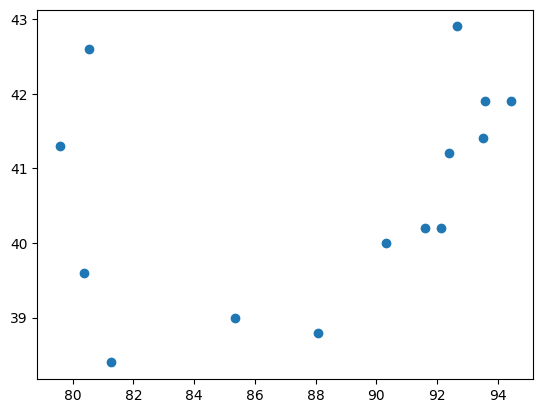

In [84]:
res = litvsgini('TUR')
plt.scatter(res['literacy'],res['gini'])

                            OLS Regression Results                            
Dep. Variable:               literacy   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.445
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.252
Time:                        15:01:55   Log-Likelihood:                -42.787
No. Observations:                  14   AIC:                             89.57
Df Residuals:                      12   BIC:                             90.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4346     43.975      0.806      0.4

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


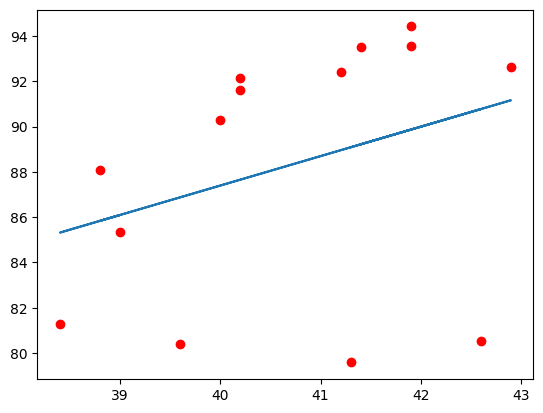

In [85]:
X = res['gini']
Y = res['literacy']
XX = sm.add_constant(X)
model = sm.OLS(Y,XX)
results = model.fit()
alpha,beta = results.params
print(results.summary())
plt.scatter(X,Y,c='red')
plt.plot(X,alpha + beta*X)

## Multiple linear regression

This time the data set we have is of the form $(x_{1i},\ldots,x_{mi},y_i)$ and we assume we have a functional relation of the form
$$ y_i \approx \beta + \sum_j \alpha_j x_{ji} $$


In [14]:
def lit_gin_mor(cntry):
    lit = extract(litrate,cntry,'literacy')
    gin = extract(gini,cntry,'gini')
    mor = extract(mortality,cntry,'mortality')
    res = lit.join([gin,mor])
    res.dropna(inplace=True)
    return res

In [90]:
res = lit_gin_mor('GRC')
X = res[['literacy','gini']]
XX = sm.add_constant(X)
Y = res['mortality']
model = sm.OLS(Y,XX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                 -0.771
Method:                 Least Squares   F-statistic:                    0.1293
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.885
Time:                        15:16:49   Log-Likelihood:                0.31045
No. Observations:                   5   AIC:                             5.379
Df Residuals:                       2   BIC:                             4.207
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3881     11.511      0.381

/home/kaygun/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Which of the independent variables explain the dependent variable better?

In [16]:
from statsmodels.formula.api import ols

In [93]:
res = lit_gin_mor('TUR')
model = ols('mortality ~ gini * literacy', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.03e-09
Time:                        15:21:58   Log-Likelihood:                -14.460
No. Observations:                  14   AIC:                             36.92
Df Residuals:                      10   BIC:                             39.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -398.3536    115.915     -3.437

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
gini,1.0,32.362351,32.362351,50.032349,3.402071e-05
literacy,1.0,381.000077,381.000077,589.027934,3.212981e-10
gini:literacy,1.0,11.926429,11.926429,18.438316,1.576286e-03
Residual,10.0,6.468285,0.646829,NaN,NaN


## Another example


In [115]:
bp = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bloodpress.txt',sep='\t')
del bp['Pt']
bp

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


In [116]:
bp.corr().style.background_gradient(cmap='bone_r').set_precision(2)

/tmp/ipykernel_18272/1833220112.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  bp.corr().style.background_gradient(cmap='bone_r').set_precision(2)


,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.00,0.66,0.95,0.87,0.29,0.72,0.16
Age,0.66,1.00,0.41,0.38,0.34,0.62,0.37
Weight,0.95,0.41,1.00,0.88,0.20,0.66,0.03
BSA,0.87,0.38,0.88,1.00,0.13,0.46,0.02
Dur,0.29,0.34,0.20,0.13,1.00,0.40,0.31
Pulse,0.72,0.62,0.66,0.46,0.40,1.00,0.51
Stress,0.16,0.37,0.03,0.02,0.31,0.51,1.00


In [120]:
model = ols('Stress ~ BP * Age * Dur * Pulse', data = bp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stress   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                 -0.282
Method:                 Least Squares   F-statistic:                    0.7215
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.714
Time:                        16:07:45   Log-Likelihood:                -87.032
No. Observations:                  20   AIC:                             206.1
Df Residuals:                       4   BIC:                             222.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.258e+06   8.47e+05      1.486      0.212   -1.09e+06    3.61e+06
BP               -1.197e+04   8190.273     -1.461      0.218   -3.47e+04    1.08e+04
Age              -2.511e+04    1.7e+04     -1.475      0.214   -7.24e+04    2.21e+04
BP:Age             239.0091    163.870      1.459      0.218    -215.968     693.986
Dur              -1.759e+05   1.37e+05     -1.285      0.268   -5.56e+05    2.04e+05
BP:Dur            1701.0762   1292.457      1.316      0.258   -1887.358    5289.511
Age:Dur           3465.9688   2789.759      1.242      0.282   -4279.644    1.12e+04
BP:Age:Dur         -33.5852     26.122     -1.286      0.268    -106.111      38.941
Pulse            -1.735e+04   1.14e+04     -1.525      0.202    -4.9e+04    1.42e+04
BP:Pulse           165.4187    110.349      1.499      0.208    -140.961     471.798
Age:Pulse          345.7404    227.896      1.517      0.204    -287.002     978.482
BP:Age:Pulse        -3.2973      2.198     -1.500      0.208      -9.401       2.806
Dur:Pulse         2418.4654   1800.934      1.343      0.250   -2581.729    7418.660
BP:Dur:Pulse       -23.4499     17.092     -1.372      0.242     -70.906      24.006
Age:Dur:Pulse      -47.5164     36.580     -1.299      0.264    -149.080      54.047
BP:Age:Dur:Pulse     0.4618      0.344      1.343      0.250      -0.493       1.416
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                0.629
Skew:                           0.277   Prob(JB):                        0.730
Kurtosis:                       3.669   Cond. No.                     2.52e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
BP,1.0,702.016071,702.016071,0.398195,0.562283
Age,1.0,3128.103722,3128.103722,1.774312,0.253677
BP:Age,1.0,780.631843,780.631843,0.442787,0.542187
Dur,1.0,1380.850173,1380.850173,0.783241,0.426146
BP:Dur,1.0,2415.971244,2415.971244,1.370379,0.306729
Age:Dur,1.0,0.344928,0.344928,0.000196,0.989510
BP:Age:Dur,1.0,2108.075423,2108.075423,1.195735,0.335611
Pulse,1.0,3269.455608,3269.455608,1.854489,0.244914
BP:Pulse,1.0,279.962256,279.962256,0.158799,0.710620
Age:Pulse,1.0,948.187084,948.187084,0.537827,0.503999


In [122]:
model = ols('Stress ~ Age + Dur + BP:Dur + BP:Age:Dur + Pulse + BP:Age:Dur:Pulse', data = bp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stress   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1.848
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.166
Time:                        16:09:20   Log-Likelihood:                -93.964
No. Observations:                  20   AIC:                             201.9
Df Residuals:                      13   BIC:                             208.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -60.5810    632.976     -0.096      0.925   -1428.044    1306.881
Age                  2.1364     17.917      0.119      0.907     -36.571      40.844
Dur                 82.4467     38.820      2.124      0.053      -1.418     166.311
BP:Dur              -0.7183      1.143     -0.628      0.541      -3.188       1.751
BP:Age:Dur          -0.0158      0.037     -0.433      0.672      -0.095       0.063
Pulse               -0.1824      7.609     -0.024      0.981     -16.621      16.256
BP:Age:Dur:Pulse     0.0002      0.000      0.981      0.344      -0.000       0.001
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.158
Skew:                          -0.189   Prob(JB):                        0.924
Kurtosis:                       2.784   Cond. No.                     2.35e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,3543.278114,3543.278114,3.265689,0.093931
Dur,1.0,1014.785886,1014.785886,0.935285,0.351142
BP:Dur,1.0,718.377300,718.377300,0.662098,0.430472
BP:Age:Dur,1.0,207.503688,207.503688,0.191247,0.669058
Pulse,1.0,5498.604298,5498.604298,5.067831,0.042315
BP:Age:Dur:Pulse,1.0,1044.980350,1044.980350,0.963114,0.344316
Residual,13.0,14105.020364,1085.001566,NaN,NaN


In [36]:
import yfinance as yf

In [125]:
ms = yf.download('MSFT')
ap = yf.download('AAPL')
cs = yf.download('CSCO')
nd = yf.download('NDX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [126]:
tmp = {}
tmp['ms'] = ms['Open']
tmp['ap'] = ap['Open']
tmp['cs'] = cs['Open']
tmp['nd'] = nd['Open']
data = pd.DataFrame(tmp).dropna()
data

,ms,ap,cs,nd
Date,,,,
1990-02-16,0.682292,0.305804,0.000000,209.929993
1990-02-20,0.678819,0.299107,0.000000,208.354996
1990-02-21,0.685764,0.292411,0.000000,205.065002
1990-02-22,0.671875,0.303571,0.000000,204.750000
1990-02-23,0.664931,0.292411,0.000000,204.190002
...,...,...,...,...
2022-10-10,233.050003,140.419998,40.630001,11048.509766
2022-10-11,227.619995,139.899994,39.810001,10865.320312
2022-10-12,225.399994,139.130005,39.700001,10810.299805


In [127]:
model = ols('nd ~ ap + cs + ms', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     nd   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.721e+05
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:18:48   Log-Likelihood:                -61704.
No. Observations:                8229   AIC:                         1.234e+05
Df Residuals:                    8225   BIC:                         1.234e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    245.2269      8.561     28.646      0.000     228.446     262.008
ap            62.2430      0.682     91.204      0.000      60.905      63.581
cs            58.5234      0.491    119.211      0.000      57.561      59.486
ms             6.5543      0.425     15.429      0.000       5.722       7.387
==============================================================================
Omnibus:                     1836.886   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8422.090
Skew:                          -1.015   Prob(JB):                         0.00
Kurtosis:                       7.521   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
ap,1.0,9.329547e+10,9.329547e+10,488759.625701,0.000000e+00
cs,1.0,5.200825e+09,5.200825e+09,27246.266237,0.000000e+00
ms,1.0,4.543916e+07,4.543916e+07,238.048294,5.759128e-53
Residual,8225.0,1.570005e+09,1.908821e+05,NaN,NaN


In [129]:
model = ols('ap ~ cs + ms', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ap   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.113e+05
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:25:07   Log-Likelihood:                -27756.
No. Observations:                8229   AIC:                         5.552e+04
Df Residuals:                    8226   BIC:                         5.554e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1516      0.136    -15.791      0.000      -2.419      -1.885
cs            -0.3480      0.007    -50.136      0.000      -0.362      -0.334
ms             0.6035      0.002    358.613      0.000       0.600       0.607
==============================================================================
Omnibus:                       43.164   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.653
Skew:                          -0.010   Prob(JB):                     4.10e-14
Kurtosis:                       3.424   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
cs,1.0,4.681580e+06,4.681580e+06,93964.887424,0.0
ms,1.0,6.407340e+06,6.407340e+06,128602.947572,0.0
Residual,8226.0,4.098411e+05,4.982265e+01,NaN,NaN


/home/kaygun/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='Date'>

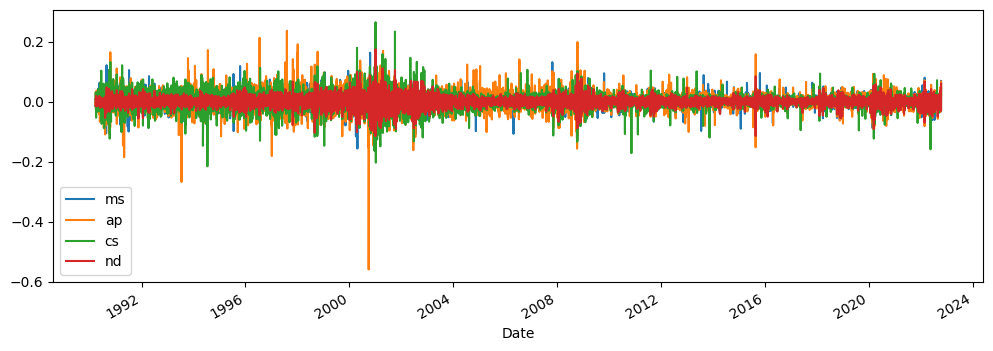

In [139]:
df = np.log(data).diff()
df.dropna(inplace=True)
df.plot(figsize=(12,4))

In [140]:
df.corr().style.background_gradient(cmap='bone_r').set_precision(2)

/tmp/ipykernel_18272/754266462.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='bone_r').set_precision(2)


,ms,ap,cs,nd
ms,1.00,0.43,0.55,0.69
ap,0.43,1.00,0.42,0.55
cs,0.55,0.42,1.00,0.69
nd,0.69,0.55,0.69,1.00


In [146]:
model = ols('ap ~ ms + nd', data=df).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:                     ap   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     1815.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:58   Log-Likelihood:                 19135.
No. Observations:                8204   AIC:                        -3.826e+04
Df Residuals:                    8201   BIC:                        -3.824e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.953      0.3

,df,sum_sq,mean_sq,F,PR(>F)
ms,1.0,1.191292,1.191292,2158.808611,0.000000e+00
nd,1.0,0.812314,0.812314,1472.040482,2.308232e-296
Residual,8201.0,4.525545,0.000552,NaN,NaN


(array([1.000e+00, 1.000e+00, 3.000e+00, 9.000e+00, 1.200e+01, 3.100e+01,
        8.300e+01, 3.240e+02, 1.143e+03, 3.227e+03, 2.327e+03, 7.630e+02,
        1.950e+02, 6.900e+01, 1.800e+01, 1.200e+01, 6.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([-0.1562727 , -0.14028591, -0.12429912, -0.10831233, -0.09232554,
        -0.07633876, -0.06035197, -0.04436518, -0.02837839, -0.0123916 ,
         0.00359519,  0.01958197,  0.03556876,  0.05155555,  0.06754234,
         0.08352913,  0.09951592,  0.1155027 ,  0.13148949,  0.14747628,
         0.16346307]),
 <BarContainer object of 20 artists>)

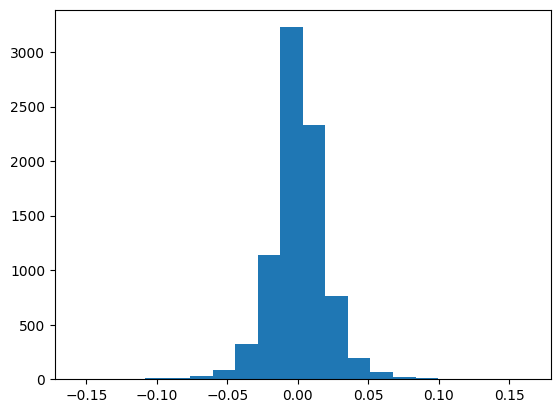

In [145]:
plt.hist(np.log(data['ms']).diff(),bins=20)

## Regularization

In [147]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
data['target'] = target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [148]:
model = ols('target ~  HouseAge + AveRooms +  Population + AveOccup + Longitude + MedInc + AveBedrms + Latitude', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:51:29   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
HouseAge,1.0,306.610949,306.610949,584.522192,2.297689e-127
AveRooms,1.0,795.653469,795.653469,1516.831383,3.136329e-320
Population,1.0,22.132566,22.132566,42.193457,8.456212e-11
AveOccup,1.0,19.925082,19.925082,37.985116,7.260819e-10
Longitude,1.0,23.288079,23.288079,44.396324,2.749560e-11
MedInc,1.0,12979.269020,12979.269020,24743.639481,0.000000e+00
AveBedrms,1.0,716.654012,716.654012,1366.227056,1.216909e-289
Latitude,1.0,1797.679863,1797.679863,3427.091492,0.000000e+00
Residual,20631.0,10821.985155,0.524550,NaN,NaN


In [150]:
data.corr().style.background_gradient(cmap='bone_r').set_precision(2)

/tmp/ipykernel_18272/261834331.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='bone_r').set_precision(2)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
target,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


In [151]:
data, target = fetch_california_housing(as_frame=True, return_X_y=True)

In [161]:
model = Ridge(alpha=0)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.44, 'HouseAge': 0.01, 'AveRooms': -0.11, 'AveBedrms': 0.65, 'Population': -0.0, 'AveOccup': -0.0, 'Latitude': -0.42, 'Longitude': -0.43}


0.606232685199805

In [160]:
model = Lasso(alpha=1e-2)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.4, 'HouseAge': 0.01, 'AveRooms': -0.04, 'AveBedrms': 0.27, 'Population': -0.0, 'AveOccup': -0.0, 'Latitude': -0.41, 'Longitude': -0.42}


0.6024178576491683

In [163]:
model = ElasticNet(alpha=0.1, l1_ratio=0.1)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.38, 'HouseAge': 0.01, 'AveRooms': -0.0, 'AveBedrms': 0.07, 'Population': 0.0, 'AveOccup': -0.0, 'Latitude': -0.32, 'Longitude': -0.32}


0.590418124099799

In [164]:
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
grid = {}
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.1)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(data,target)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.386e+03, tolerance: 2.235e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.288e+03, tolerance: 2.204e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

In [165]:
results

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=ElasticNet(alpha=0.1, l1_ratio=0.1), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0,
                                   10.0, 100.0],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [166]:
results.best_params_

{'alpha': 0.0, 'l1_ratio': 0.0}